# 확률적 경사 하강법

점진적인 학습: 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련   
1. 대표적 학습 알고리즘: <u>확률적 경사 하강법(Stochastic Gradient Descent)</u>   

'확률적' 이란, '무작위'. '경사'란 '기울기'. '하강법'이란 '내려가는 방법'   
훈련 세트에서 랜덤하게 하나의 샘플을 골라 가파른 경사를 찾음. 전체 샘플을 모두 사용할 때까지.   
'에포크(epoch)' : 확률적 경사 하강법에서 훈련 세트를 모두 사용하는 과정 '한 번'

2. <u>미니배치 경사 하강법</u> : 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식

3. <u>배치 경사 하강법</u> : 전체 샘플을 사용 - 컴퓨터 자원을 많이 사용

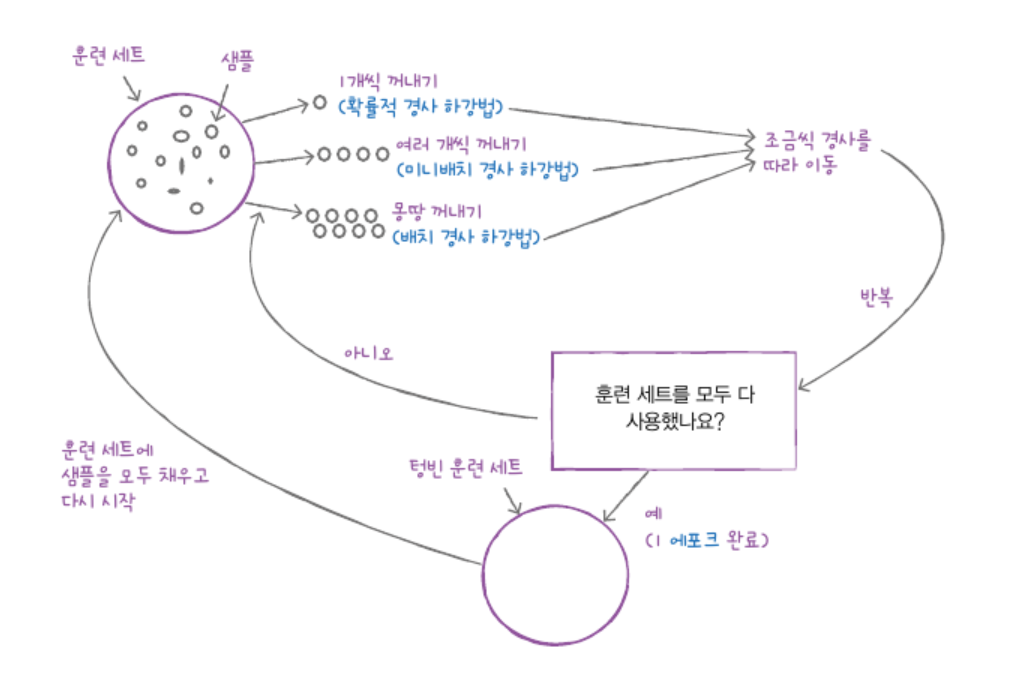

**손실 함수** : 머신러닝 알고리즘의 예측이 얼마나 부족한지 측정하는 기준   
손실 함수의 값이 작을수록 좋다.   
이진 분류에서는 '로지스틱 손실 함수' or '이진 크로스엔트로피 손실 함수'   
다중 분류에서는 '크로스엔트로피 손실 함수'

## SGDClassifier
### 런타임 유형을 GPU로 변경

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# 사이킷런 1.1.0 버전 이하일 경우 'log_loss'를 'log'로 바꾸어 주세요.
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # 훈련 횟수 10번
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# Warning : 반복 횟수가 너무 적어서 모델이 충분히 수렴하지 않았다는 뜻으로 ConvergenceWarning 경고가 나온다.

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)    # partial_fit() 함수 이용: 모델을 이어서 훈련할 때 fit()말고 partial_fit() 메서드 이용.
                                              # 호출할 때마다 1 에포크씩 이어서 훈련할 수 있다.

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 에포크를 한 번 더 실행하니 정확도가 향상됨 (실행할 때마다 정확도가 다르게 나타남)

0.8151260504201681
0.85


## 에포크와 과대/과소적합

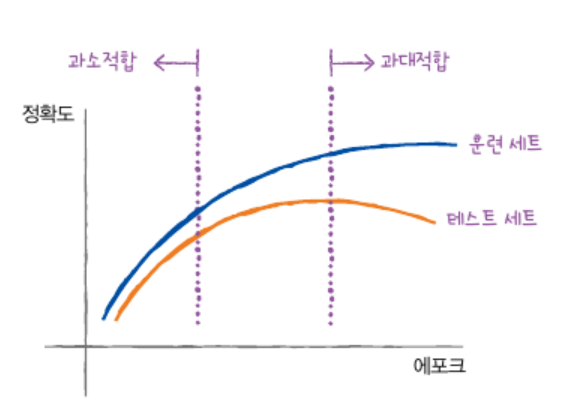



에포크가 진행됨에 따른 모델의 정확도   
훈련 세트 점수는 꾸준히 증가하지만, 테스트 세트 점수는 감소하기 시작 = 과대적합의 시작   
'조기 종료' : 과대 적합이 시작하기 전에 훈련을 멈추는 것

In [16]:
import numpy as np

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log_loss', random_state=42)

# 에포크가 여러번 실행되는 동안 score의 변화를 확인하기 위해 리스트에 넣어준다.
train_score = []
test_score = []

classes = np.unique(train_target)

In [17]:
# 300번의 에포크동안 훈련 실시
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

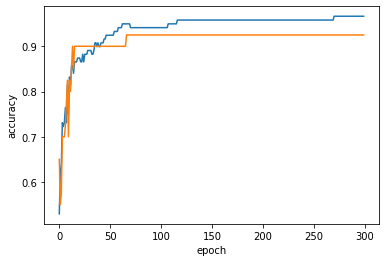

In [18]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 그래프에서 확인하기에 100번 반복이 적절한 것으로 보임

In [19]:
# 위 분석을 통해 max_iter를 100으로 지정하여 알고리즘 학습 실시
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)      # tol 매개변수: 일정 에포크동안 성능이 향상되지 않으면 더 훈련하지 않고 중단.
sc.fit(train_scaled, train_target)                                                # None으로 해야 자동으로 멈추지 않는다.

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [21]:
# 지금껏 쓴 손실함수: log_loss (로지스틱 손실함수)
# 기본값은 hinge
# 힌지 손실 = 서포트 벡터 머신 : 정확도가 약간 낮다...

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
